# Machine Learning Model

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import pandas as pd
import os

### 1. Clean & Prepare Dataset

In [2]:
# Read csv into dataframe
df = pd.read_csv(os.path.join("Resources", "customer_data.csv"))
# df = df[df["id"] <= 11]
# df = df.set_index("id")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
corr_df = df.drop(['id'], axis=1)
corr_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Check for null values
for x in df:
    print(f' Column {x}: Unique Value(s): {pd.isna(df[x]).unique()}') 

 Column id: Unique Value(s): [False]
 Column Gender: Unique Value(s): [False]
 Column Age: Unique Value(s): [False]
 Column Driving_License: Unique Value(s): [False]
 Column Region_Code: Unique Value(s): [False]
 Column Previously_Insured: Unique Value(s): [False]
 Column Vehicle_Age: Unique Value(s): [False]
 Column Vehicle_Damage: Unique Value(s): [False]
 Column Annual_Premium: Unique Value(s): [False]
 Column Policy_Sales_Channel: Unique Value(s): [False]
 Column Vintage: Unique Value(s): [False]
 Column Response: Unique Value(s): [False]


# EDA

In [5]:
df.shape

(381109, 12)

In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Response

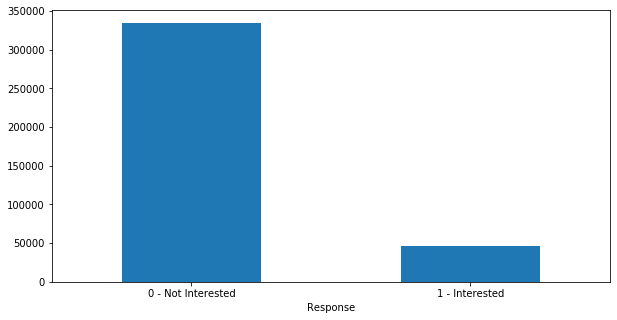

In [7]:
# sb.countplot(df.Response)
response_df = df[["Response"]].replace({0: "0 - Not Interested", 1: "1 - Interested"})
response_df.groupby(['Response'])['Response'].count().plot(kind="bar", rot = 0, figsize=(10,5))

# Gender Responses

In [8]:
gender_cnt = df.groupby(["Response", "Gender"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
gender_pivot = gender_cnt.pivot_table(index=["Gender"], columns=["Response"],values="results")
gender_pivot = gender_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"})
gender_pivot

Response,0 - Not Interested,1 - Interested
Gender,,
Female,156835,18185
Male,177564,28525


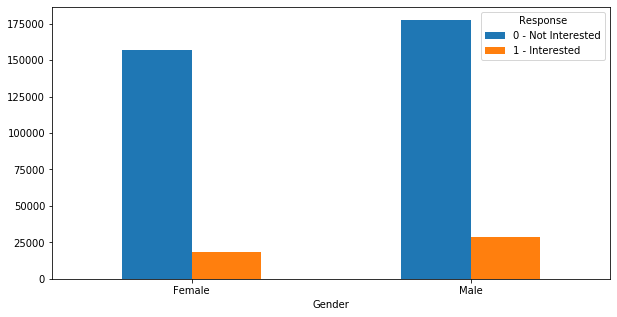

In [9]:
gender_pivot.plot(kind="bar", rot = 0, figsize=(10,5))

# Age Group Responses

In [10]:
# Create the decade bins 
bins = [0, 30, 40, 50, 60, 70, 100]

# Create the names for the bins
group_names = ["20 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70+"]

# add bin column to dataframe
df["Age_Group"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

# reorganize columns
age_df = df[['Age', 'Age_Group','Response','id','Driving_License']]

age_cnt = age_df.groupby(["Response", "Age_Group"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
age_pivot = age_cnt.pivot_table(index=["Age_Group"], columns=["Response"],values="results")
age_pivot = age_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"})
age_pivot

Response,0 - Not Interested,1 - Interested
Age_Group,,
20 to 29,154278,7183
30 to 39,43566,11597
40 to 49,59916,16025
50 to 59,37589,7716
60 to 69,24795,3043
70+,14255,1146


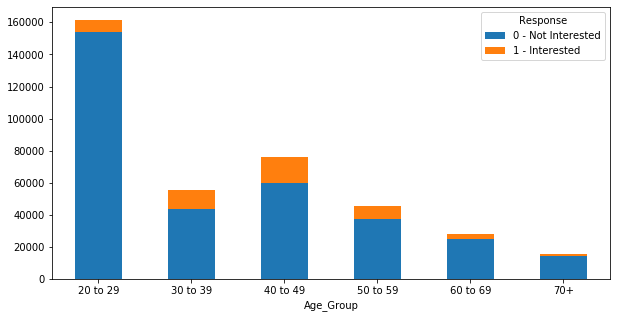

In [11]:
age_pivot.plot(kind="bar", rot=0, stacked=True, figsize=(10,5))

# Driving License Responses

In [12]:
dl_cnt = df.groupby(["Response", "Driving_License"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
dl_cnt

,Response,Driving_License,results
0,0,0,771
1,0,1,333628
2,1,0,41
3,1,1,46669


In [13]:
# Driving License vs. Age Group Responses
age_dl_cnt = age_df.groupby(["Driving_License","Age_Group"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
age_pivot = age_dl_cnt.pivot_table(index=["Age_Group"], columns=["Driving_License"],values="results")
age_pivot = age_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"})
age_pivot

Driving_License,0 - Not Interested,1 - Interested
Age_Group,,
20 to 29,3,161458
30 to 39,8,55155
40 to 49,78,75863
50 to 59,133,45172
60 to 69,288,27550
70+,302,15099


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EF6820988>,
      dtype=object)

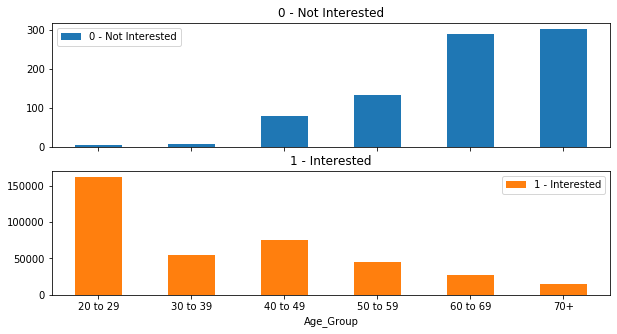

In [14]:
age_pivot.plot.bar(rot = 0, subplots=True, figsize=(10,5))

# Previouisly Insured Responses

In [15]:
pi_cnt = df.groupby(["Response","Previously_Insured"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
pi_pivot = pi_cnt.pivot_table(index=["Previously_Insured"], columns=["Response"],values="results").reset_index().rename_axis(None, axis=1)
pi_pivot["Previously_Insured"] = pi_pivot["Previously_Insured"].replace({0: 'Not Insured', 1: 'Insured'})
pi_pivot = pi_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"}).set_index("Previously_Insured")
pi_pivot

,0 - Not Interested,1 - Interested
Previously_Insured,,
Not Insured,159929,46552
Insured,174470,158


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EF692C148>,
      dtype=object)

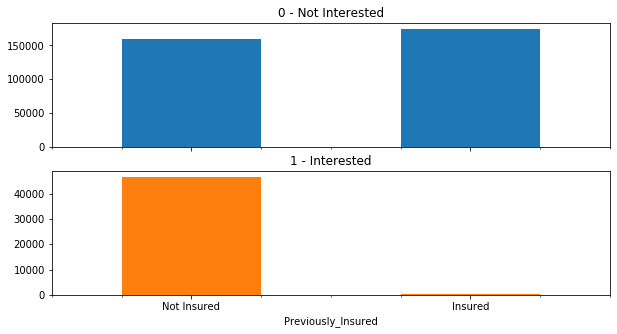

In [16]:
pi_pivot.plot.bar(rot = 0, subplots=True, figsize=(10,5), legend=False)

# Vehicle Age Responses

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EF6906C48>,
      dtype=object)

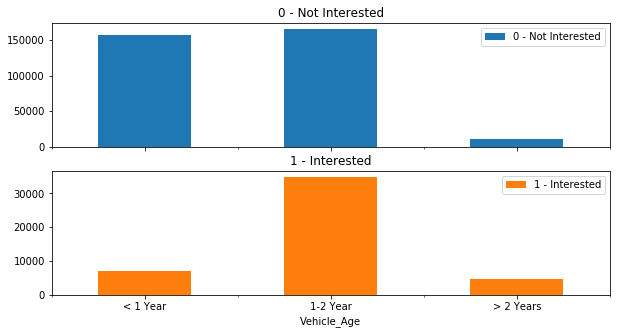

In [17]:
car_age_cnt = df.groupby(["Response","Vehicle_Age"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
car_age_pivot = car_age_cnt.pivot_table(index=["Vehicle_Age"], columns=["Response"],values="results")
car_age_pivot = car_age_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"})
car_age_pivot.reindex(["< 1 Year","1-2 Year","> 2 Years"]).plot.bar(rot = 0, subplots=True, figsize=(10,5))

# Annual Premiun boxplot

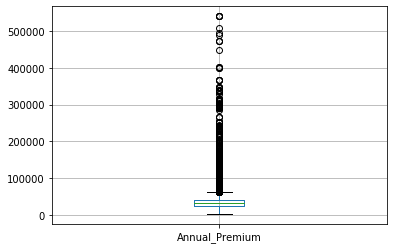

In [18]:
ap = df['Annual_Premium']
ap_df = pd.DataFrame(ap)
ap_df.boxplot()

# Vintage Responses

In [19]:
# Create the decade bins 
bins = [0, 90, 182, 500]

# Create the names for the bins
group_names = ["0 to 89", "90 to 181", "182+"]

# add bin column to dataframe
df["Vintage_Group"] = pd.cut(df["Vintage"], bins, labels=group_names, include_lowest=True)

# reorganize columns
vin_df = df[['Vintage', 'Vintage_Group', 'Response','id']]
vin_df.head()

,Vintage,Vintage_Group,Response,id
0,217,182+,1,1
1,183,182+,0,2
2,27,0 to 89,1,3
3,203,182+,0,4
4,39,0 to 89,0,5


In [20]:
vin_cnt = vin_df.groupby(["Response", "Vintage_Group"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index() 
vin_pivot = vin_cnt.pivot_table(index=["Vintage_Group"], columns=["Response"],values="results")
vin_pivot = vin_pivot.rename(columns={0: "0 - Not Interested", 1: "1 - Interested"})
vin_pivot

Response,0 - Not Interested,1 - Interested
Vintage_Group,,
0 to 89,93522,13134
90 to 181,106097,14727
182+,134780,18849


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EF6A20888>,
      dtype=object)

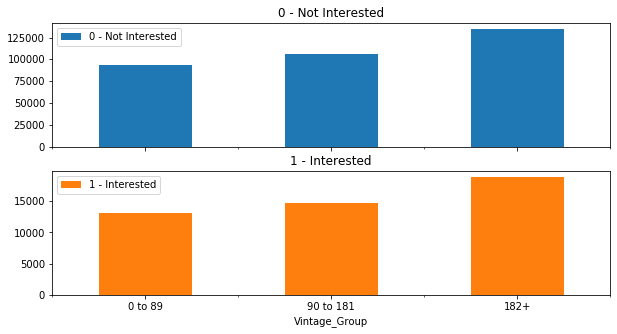

In [21]:
vin_pivot.plot.bar(rot = 0, subplots=True, figsize=(10,5))

# Vintage (Car Age) vs. Annual Premium Scatter

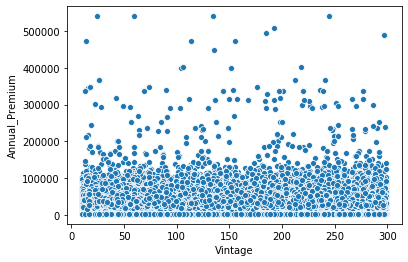

In [22]:
sb.scatterplot(x=df['Vintage'],y=df['Annual_Premium'])

# Feature Engineering

In [23]:


corr_df["Gender"] = corr_df["Gender"].replace({'Male': 1, 'Female': 0})

corr_df["Vehicle_Age"] = corr_df["Vehicle_Age"].replace({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})

corr_df["Vehicle_Damage"] = corr_df["Vehicle_Damage"].replace({'Yes': 1, 'No': 0})

corr_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


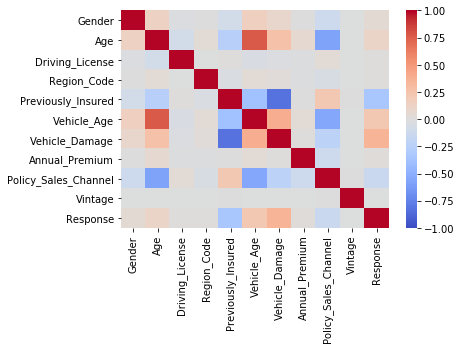

In [24]:
sb.heatmap(corr_df.corr(), vmin=-1, vmax=1, center= 0, cmap='coolwarm')

In [35]:
# Drop id column
df = df.drop(columns=['id'])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [36]:
# Check data types
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [37]:
# Convert objects in Gender column into numeric values
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [38]:
# Convert objects in Vehicle Age column into numeric values
df['Vehicle_Age'] = df['Vehicle_Age'].replace('< 1 Year', 1)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('1-2 Year', 2)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('> 2 Years', 3)

In [39]:
# Convert objects in Vehicle Damage column into numeric values
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('Yes', 1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('No', 0)

In [40]:
# Check data types again to ensure all objects are converted
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [41]:
# View df
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### 2. Run K Nearest Neighborbors Algorithm

In [44]:
y = df['Response']

In [45]:
X = df.drop('Response', axis=1)
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,3,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,0,33536.0,26.0,183
2,1,47,1,28.0,0,3,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [48]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.826
k: 3, Train/Test Score: 0.913/0.846
k: 5, Train/Test Score: 0.897/0.856
k: 7, Train/Test Score: 0.890/0.861
k: 9, Train/Test Score: 0.886/0.864
k: 11, Train/Test Score: 0.884/0.868
k: 13, Train/Test Score: 0.883/0.869
k: 15, Train/Test Score: 0.882/0.870
k: 17, Train/Test Score: 0.881/0.871
k: 19, Train/Test Score: 0.880/0.872


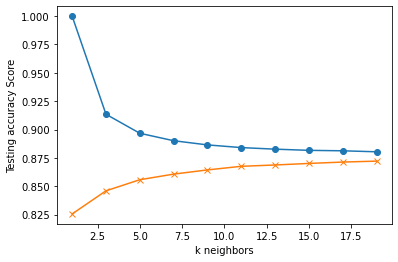

In [49]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Due to large amount of data points, it takes a significant amount of time to run the KNN algorithm to find the best value of k.
Hence, the square root method is opted instead.

In [16]:
# K using square root method i.e. 381110^(1/2)
knn = KNeighborsClassifier(n_neighbors=617)
knn.fit(X_train_scaled, y_train)
print('k=617 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=617 Test Acc: 0.877


In [50]:
# Testing - using test.csv
# Predict response using sample id 28110
new_data = [[1, 25, 1, 11, 1, 1, 0, 35786, 152, 53]]
predicted_class = knn.predict(new_data)
print(predicted_class)

[0]


In [53]:
# Testing - using customer_data.csv
# Predict response using sample id 3 who wants to buy insurance
new_data = [[1, 47, 1, 28, 0, 3, 1, 38294, 26, 27]]
predicted_class = knn.predict(new_data)
print(predicted_class)

[0]
